# Scientific Computing and Modelling in Python Part 2

## 3.4 Regressions

Now computing the correlation between variables is good if we want to see whether is there a linear relationship between two variables. However, what if we wanted to know whether does a Pokemon being taller *causes* them to be heavier? This is where regressions come into play. The let us see how the dependent/response variable (weight) is affected by the independent/control/feature variable (height).

We shift gears again to now using `StatsModel` package. In industry, there are two main packages for statistical modelling (excluding neural networks tools etc). One is `StatsModel` and another known as `SkLearn`. Whilst `SkLearn` is what is generally used in industry, due to it being `production-code` worthy, we will be working with `StatsModel` for now.

The reason is that `StatsModel` contains more models and tests familiar to Econometricians whilst `SkLearn` revolves around more cutting edge __machine learning__ techniques.

First, we need to create a `linear regression object` which can be used to store all the information about our regression. You can think of it as a very fancy list if it helps.

Now we need to do the actual regression on the data. Note that the independent (height) variable goes first in terms of arguments for the `fit()` function.

In [10]:
import numpy as np
import statsmodels.api as sm

In [11]:
height = np.array([120, 132, 144, 150])
weight = np.array([54, 58, 68, 70])

In [12]:
model = sm.OLS(weight, height)
model_result = model.fit()
print(model_result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     3700.
Date:                Sun, 24 Mar 2019   Prob (F-statistic):           9.79e-06
Time:                        17:59:32   Log-Likelihood:                -8.0027
No. Observations:                   4   AIC:                             18.01
Df Residuals:                       3   BIC:                             17.39
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4587      0.008     60.827      0.0

/usr/local/lib/python3.7/site-packages/statsmodels/stats/stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  "samples were given." % int(n), ValueWarning)


Notice we don't have an intercept. If we want to add it, we need to specify beforehand in our independent variable array.

In [13]:
height_modified = sm.add_constant(height)

In [15]:
print(height_modified)

[[  1. 120.]
 [  1. 132.]
 [  1. 144.]
 [  1. 150.]]


We now have a column of 1's for our constant!

Let's try our regression again.

In [16]:
model = sm.OLS(weight, height_modified)
model_result = model.fit()
print(model_result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     56.67
Date:                Sun, 24 Mar 2019   Prob (F-statistic):             0.0172
Time:                        18:00:14   Log-Likelihood:                -6.5203
No. Observations:                   4   AIC:                             17.04
Df Residuals:                       2   BIC:                             15.81
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -15.3898     10.383     -1.482      0.2

/usr/local/lib/python3.7/site-packages/statsmodels/stats/stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  "samples were given." % int(n), ValueWarning)


That looks better now!

If we want to access the coefficients, it's easy! Just do `.params`. We can then access the parameter values using numpy indexing as usual.

In [17]:
print(model_result.params)

[-15.38983051   0.57062147]


If we want to access the test-statistics on the parameters, we can go `.tvalues`.

In [18]:
print(model_result.tvalues)

[-1.48216504  7.52809552]


When in doubt on what you can get, just go `model_result.` and then hit the `tab` button which will bring a list of things you can access from the variable. Such as the $R^2$.

In [20]:
model_result.rsquared

0.9659123189091942

#### Excercise

1. Create your own numpy arrays and run your own regressions. Ask for help if needed! Try doing it with 2 or more variables.

2. (Extension). If you have done ECMT2160, you would have seen the `logit` regression. Try implementing [it](https://www.statsmodels.org/dev/generated/statsmodels.discrete.discrete_model.Logit.html). Instead of `sm.OLS`, use `sm.Logit` and keep everything else the same.

## 3.5 Working with data

We now begin working with actual data. Here, we will be using the `Pandas` library. This is a library that is good for reading in actual `csv` (comma-separated values) data and working with it.

You can think of csv files like Excel files except for each row, each column is separated by a `,` (hence the name!). For example, if I had 3 rows of data regarding `name`, `age`, and `height`, it would look like this:

_Charles, 23, 185_

_David, 20, 182_

_Edward Jacobs, 26, 192_

Here, the `name` variable is the first entry of each line and it ends once we reach the `,`. After that, we have the `height` variable until the next `,`. Lets try some examples now!

We will be looking at Pokemon data and reading the data in via an URL to make life easier.

In [1]:
import pandas as pd

The `read_csv` function will take a csv file and turn it into a pandas dataframe for us to manipulate.

In [3]:
data = pd.read_csv("https://gist.githubusercontent.com/armgilles/194bcff35001e7eb53a2a8b441e8b2c6/raw/92200bc0a673d5ce2110aaad4544ed6c4010f687/pokemon.csv")

If you type the name of the dataframe called `data`, you get to see a preview.

In [4]:
data

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


There are some additional commands we can do:

In [21]:
data.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [22]:
data.head(50)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


In [23]:
data.tail()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True
799,721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,True


In [24]:
data.tail(20)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
780,710,PumpkabooAverage Size,Ghost,Grass,335,49,66,70,44,55,51,6,False
781,710,PumpkabooSmall Size,Ghost,Grass,335,44,66,70,44,55,56,6,False
782,710,PumpkabooLarge Size,Ghost,Grass,335,54,66,70,44,55,46,6,False
783,710,PumpkabooSuper Size,Ghost,Grass,335,59,66,70,44,55,41,6,False
784,711,GourgeistAverage Size,Ghost,Grass,494,65,90,122,58,75,84,6,False
785,711,GourgeistSmall Size,Ghost,Grass,494,55,85,122,58,75,99,6,False
786,711,GourgeistLarge Size,Ghost,Grass,494,75,95,122,58,75,69,6,False
787,711,GourgeistSuper Size,Ghost,Grass,494,85,100,122,58,75,54,6,False
788,712,Bergmite,Ice,NaN,304,55,69,85,32,35,28,6,False
789,713,Avalugg,Ice,NaN,514,95,117,184,44,46,28,6,False


We can get the names of the columns.

In [25]:
print(data.columns)

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')


We can access columns of our dataframe in 2 ways.

In [26]:
# Method 1:
data["Name"]

0                      Bulbasaur
1                        Ivysaur
2                       Venusaur
3          VenusaurMega Venusaur
4                     Charmander
5                     Charmeleon
6                      Charizard
7      CharizardMega Charizard X
8      CharizardMega Charizard Y
9                       Squirtle
10                     Wartortle
11                     Blastoise
12       BlastoiseMega Blastoise
13                      Caterpie
14                       Metapod
15                    Butterfree
16                        Weedle
17                        Kakuna
18                      Beedrill
19         BeedrillMega Beedrill
20                        Pidgey
21                     Pidgeotto
22                       Pidgeot
23           PidgeotMega Pidgeot
24                       Rattata
25                      Raticate
26                       Spearow
27                        Fearow
28                         Ekans
29                         Arbok
          

In [27]:
# Method 2:
data.Name

0                      Bulbasaur
1                        Ivysaur
2                       Venusaur
3          VenusaurMega Venusaur
4                     Charmander
5                     Charmeleon
6                      Charizard
7      CharizardMega Charizard X
8      CharizardMega Charizard Y
9                       Squirtle
10                     Wartortle
11                     Blastoise
12       BlastoiseMega Blastoise
13                      Caterpie
14                       Metapod
15                    Butterfree
16                        Weedle
17                        Kakuna
18                      Beedrill
19         BeedrillMega Beedrill
20                        Pidgey
21                     Pidgeotto
22                       Pidgeot
23           PidgeotMega Pidgeot
24                       Rattata
25                      Raticate
26                       Spearow
27                        Fearow
28                         Ekans
29                         Arbok
          

##### Generally, it is safer to use method 1.

The datatype returned is known as a `series` type. An easy way to think of it is that a `DataFrame` comprises of multiple `series` types.

We can also get a numerous columns by passing in a list into our query.

In [ ]:
data[ ["Name", "Defense"] ]

### Excercises

1) Query to get all the `Total` values.

2) Query to get all the `Speed` values.

3) Query to get both `Total` and `Speed` values.

In [33]:
# We can manipulate it like a list.
list_of_attack = list(data.Attack)
print(list_of_attack)

[49, 62, 82, 100, 52, 64, 84, 130, 104, 48, 63, 83, 103, 30, 20, 45, 35, 25, 90, 150, 45, 60, 80, 80, 56, 81, 60, 90, 60, 85, 55, 90, 75, 100, 47, 62, 92, 57, 72, 102, 45, 70, 41, 76, 45, 70, 45, 80, 50, 65, 80, 70, 95, 55, 65, 55, 80, 45, 70, 52, 82, 80, 105, 70, 110, 50, 65, 95, 20, 35, 50, 50, 80, 100, 130, 75, 90, 105, 40, 70, 80, 95, 120, 85, 100, 65, 75, 75, 35, 60, 65, 85, 110, 45, 70, 80, 105, 65, 95, 35, 50, 65, 65, 45, 48, 73, 105, 130, 30, 50, 40, 95, 50, 80, 120, 105, 55, 65, 90, 85, 130, 5, 55, 95, 125, 40, 65, 67, 92, 45, 75, 45, 110, 50, 83, 95, 125, 155, 100, 10, 125, 155, 85, 48, 55, 65, 65, 130, 60, 40, 60, 80, 115, 105, 135, 110, 85, 90, 100, 64, 84, 134, 110, 190, 150, 100, 49, 62, 82, 52, 64, 84, 65, 80, 105, 46, 76, 30, 50, 20, 35, 60, 90, 90, 38, 58, 40, 25, 30, 20, 40, 50, 75, 40, 55, 75, 95, 80, 20, 50, 100, 75, 35, 45, 55, 70, 30, 75, 65, 45, 85, 65, 65, 85, 75, 60, 72, 33, 80, 65, 90, 70, 75, 85, 125, 80, 120, 95, 130, 150, 10, 125, 185, 95, 80, 130, 40, 50, 

In [34]:
# We can loop through the list and do stuff based on it.

for attack in list_of_attack:
    if attack < 30:
        print("Small attack.")
    else:
        print("Big attack")

Big attack
Big attack
Big attack
Big attack
Big attack
Big attack
Big attack
Big attack
Big attack
Big attack
Big attack
Big attack
Big attack
Big attack
Small attack.
Big attack
Big attack
Small attack.
Big attack
Big attack
Big attack
Big attack
Big attack
Big attack
Big attack
Big attack
Big attack
Big attack
Big attack
Big attack
Big attack
Big attack
Big attack
Big attack
Big attack
Big attack
Big attack
Big attack
Big attack
Big attack
Big attack
Big attack
Big attack
Big attack
Big attack
Big attack
Big attack
Big attack
Big attack
Big attack
Big attack
Big attack
Big attack
Big attack
Big attack
Big attack
Big attack
Big attack
Big attack
Big attack
Big attack
Big attack
Big attack
Big attack
Big attack
Big attack
Big attack
Big attack
Small attack.
Big attack
Big attack
Big attack
Big attack
Big attack
Big attack
Big attack
Big attack
Big attack
Big attack
Big attack
Big attack
Big attack
Big attack
Big attack
Big attack
Big attack
Big attack
Big attack
Big attack
Big attack
B

Small note, we have an annoying `#` variable that we don't need since we have an index. We can easily drop this.

In [28]:
del data["#"]

In [29]:
data.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


It's gone!

In [31]:
# Gets the length of dataframe
len(data)

800

What if we want Pokemon with `Attack` larger than 30? We can do something like indexing from earlier.

In [37]:
data["Attack"] > 30

0       True
1       True
2       True
3       True
4       True
5       True
6       True
7       True
8       True
9       True
10      True
11      True
12      True
13     False
14     False
15      True
16      True
17     False
18      True
19      True
20      True
21      True
22      True
23      True
24      True
25      True
26      True
27      True
28      True
29      True
       ...  
770     True
771     True
772     True
773     True
774     True
775     True
776     True
777     True
778     True
779     True
780     True
781     True
782     True
783     True
784     True
785     True
786     True
787     True
788     True
789     True
790    False
791     True
792     True
793     True
794     True
795     True
796     True
797     True
798     True
799     True
Name: Attack, Length: 800, dtype: bool

In [38]:
data[data["Attack"] > 30]

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


In [42]:
len(data[data["Attack"] > 30])

754

It works! We dropped 46 pokemon.

## Excercise

1) Grab pokemon with defense less than 60

2) Grab pokemon that are Legendary

3) Grab pokemon that is rock type.

In [45]:
# If we want to get a bunch of pokemon types
types_we_want = ["Fire", "Psychic", "Ghost"]

In [44]:
data[data["Type 1"].isin(types_we_want)]

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
42,Vulpix,Fire,NaN,299,38,41,40,50,65,65,1,False
43,Ninetales,Fire,NaN,505,73,76,75,81,100,100,1,False
63,Growlithe,Fire,NaN,350,55,70,45,70,50,60,1,False
64,Arcanine,Fire,NaN,555,90,110,80,100,80,95,1,False
68,Abra,Psychic,NaN,310,25,20,15,105,55,90,1,False


If we want Pokemon with less than 50 attack and greater than 90 speed. We use the `&` symbol.

In [46]:
data[(data["Attack"] < 50) & (data["Speed"] > 90)]

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
69,Kadabra,Psychic,NaN,400,40,35,30,120,70,105,1,False
108,Voltorb,Electric,NaN,330,40,30,50,55,55,100,1,False
341,Minun,Electric,NaN,405,60,40,50,75,85,95,3,False
405,Luvdisc,Water,NaN,330,43,30,55,40,65,97,3,False
464,Pachirisu,Electric,NaN,405,60,45,70,45,90,95,4,False
746,MeowsticMale,Psychic,NaN,466,74,48,76,83,81,104,6,False
747,MeowsticFemale,Psychic,NaN,466,74,48,76,83,81,104,6,False


If we want Pokemon with less than 50 attack _OR_ greater than 90 speed. We use the `|` symbol.

In [47]:
data[(data["Attack"] < 50) | (data["Speed"] > 90)]

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False
13,Caterpie,Bug,NaN,195,45,30,35,20,20,45,1,False
14,Metapod,Bug,NaN,205,50,20,55,25,25,30,1,False
15,Butterfree,Bug,Flying,395,60,45,50,90,80,70,1,False
16,Weedle,Bug,Poison,195,40,35,30,20,20,50,1,False
17,Kakuna,Bug,Poison,205,45,25,50,25,25,35,1,False


In [48]:
# We can store our dataframe to be referenced later.
new_data = data[(data["Attack"] < 50) & (data["Speed"] > 90)]

We can save data as csv by `to_csv("file_name.csv", index=False)`

In [50]:
new_data.to_csv("My_New_data.csv", index=False)

# If you want there to be an index for each observation, then set index=True.

## Excercise

1) Get Fairy type pokemon with Sp. Attack between 50-90.

## Combining this with regressions.

In [54]:
# We can combine what we did with regressions earlier.
# Just pass in the columns you want to regress on each other.

In [53]:
model = sm.OLS(data["Attack"], data["Sp. Atk"])
model_result = model.fit()
print(model_result.summary())

                            OLS Regression Results                            
Dep. Variable:                 Attack   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     3640.
Date:                Sun, 24 Mar 2019   Prob (F-statistic):          9.12e-300
Time:                        18:36:02   Log-Likelihood:                -4007.1
No. Observations:                 800   AIC:                             8016.
Df Residuals:                     799   BIC:                             8021.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Sp. Atk        0.9688      0.016     60.335      0.0

## Excercise

1) Try regressing Attack and Defense

2) Try a multivariate regression with Attack, Defense and Speed.

In [61]:
"""
Multivariate setting.
"""

# Get independent variables.
X = data[['Defense', 'Speed']]

# Now regress as usual!
model = sm.OLS(data["Attack"], X)
model_result = model.fit()
print(model_result.summary())

                            OLS Regression Results                            
Dep. Variable:                 Attack   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     3606.
Date:                Sun, 24 Mar 2019   Prob (F-statistic):               0.00
Time:                        18:40:05   Log-Likelihood:                -3770.5
No. Observations:                 800   AIC:                             7545.
Df Residuals:                     798   BIC:                             7554.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Defense        0.5580      0.023     24.679      0.0

## Summary statistics

We can compute summary statistics just like for numpy.

In [62]:
data["Attack"].mean()

79.00125

In [64]:
data["Attack"].std()

32.45736586949845

In [66]:
data["Attack"].max()

190

In [67]:
data["Attack"].min()

5

## Excercise

1) Compute summary statistics for any variables you're interested in.

## 3.6 Data Visualisation

At the beginning of any data analysis, it is always worthwhile to visualise what the data looks like to look for any irregularities, observe any patterns, or understand the dataset at hand. A picture is worth a thousand words and hence the effectiveness of plotting data cannot be understated.

Unfortunately, plotting data in Python is a more difficult task compared to other programming languages such as R.

You can install matplotlib [here](https://matplotlib.org/users/installing.html) in case you currently do not have it set up.

In [69]:
import matplotlib.pyplot as plt

## First fancy plot

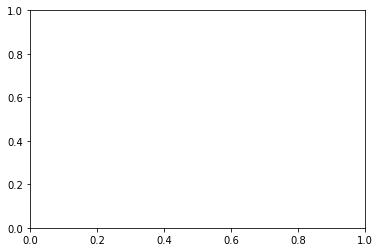

In [70]:
# This generates a figure with an axes.
fig, ax = plt.subplots()

We can just go `plt.scatter(x,y)`

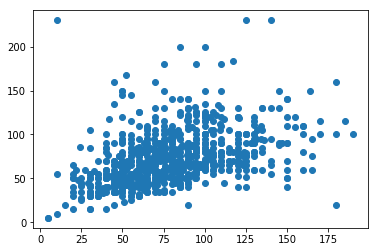

In [73]:
plt.scatter(data["Attack"], data["Defense"])

What if we want to add more things?

Text(0,0.5,'Defense')

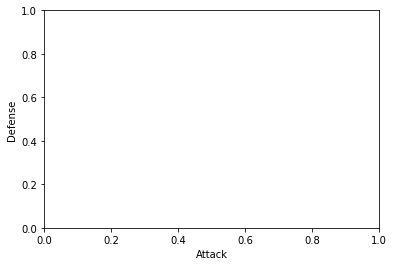

In [74]:
plt.xlabel("Attack")
plt.ylabel("Defense")

Oh no! It's because we are operating on different figures.

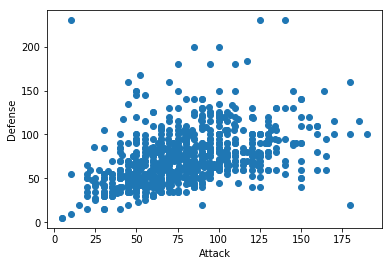

In [75]:
plt.scatter(data["Attack"], data["Defense"])
plt.xlabel("Attack")
plt.ylabel("Defense")
plt.show()

We can also specify colour by the `c` argument and specify depth by the `alpha` argument.

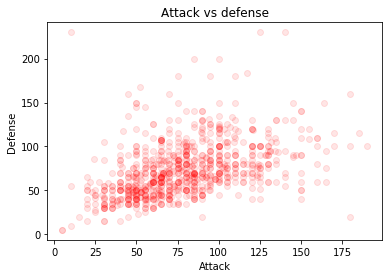

In [83]:
plt.scatter(data["Attack"], data["Defense"], c="red", alpha=0.1)
plt.xlabel("Attack")
plt.ylabel("Defense")
plt.title("Attack vs defense")
plt.show()

# EXTENSIONS ON WHAT YOU CAN DO WITH PLOTTING IN MATPLOTLIB.

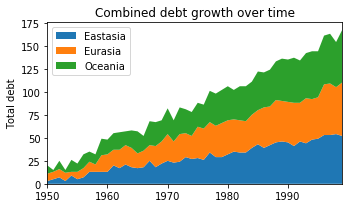

In [11]:
# Generating data.
rng = np.arange(50) # Generates numbers from 0 to 49
rnd = np.random.randint(0, 10, size=(3, rng.size)) # Generates random numbers
yrs = 1950 + rng # Generates years from 1950 to 1999

# Plotting the data.
fig, ax = plt.subplots(figsize=(5, 3))
ax.stackplot(yrs, rng + rnd, labels=['Eastasia', 'Eurasia', 'Oceania'])
ax.set_title('Combined debt growth over time')
ax.legend(loc='upper left')
ax.set_ylabel('Total debt') # Y axis name
ax.set_xlim(xmin=yrs[0], xmax=yrs[-1]) # X axis specification
fig.tight_layout() # Formats layout

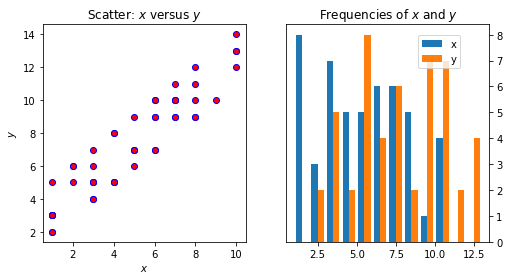

In [12]:
x = np.random.randint(low=1, high=11, size=50)
y = x + np.random.randint(1, 5, size=x.size)
data = np.column_stack((x, y))

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,
                               figsize=(8, 4))
# Scatter plot of data.
ax1.scatter(x=x, y=y, marker='o', c='r', edgecolor='b')
ax1.set_title('Scatter: $x$ versus $y$')
ax1.set_xlabel('$x$')
ax1.set_ylabel('$y$')

# Frequency of data plot.
ax2.hist(data, bins=np.arange(data.min(), data.max()),
         label=('x', 'y'))
ax2.legend(loc=(0.65, 0.8))
ax2.set_title('Frequencies of $x$ and $y$')
ax2.yaxis.tick_right()

## Hard Example

In [24]:
from io import BytesIO
import tarfile
from urllib.request import urlopen

url = 'http://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.tgz'
b = BytesIO(urlopen(url).read())
fpath = 'CaliforniaHousing/cal_housing.data'

with tarfile.open(mode='r', fileobj=b) as archive:
    housing = np.loadtxt(archive.extractfile(fpath), delimiter=',')

In [25]:
y = housing[:, -1]
p1op, age = housing[:, [4, 7]].T

In [27]:
def add_titlebox(ax, text):
    ax.text(.55, .8, text,
        horizontalalignment='center',
        transform=ax.transAxes,
        bbox=dict(facecolor='white', alpha=0.6),
        fontsize=12.5)
    return ax

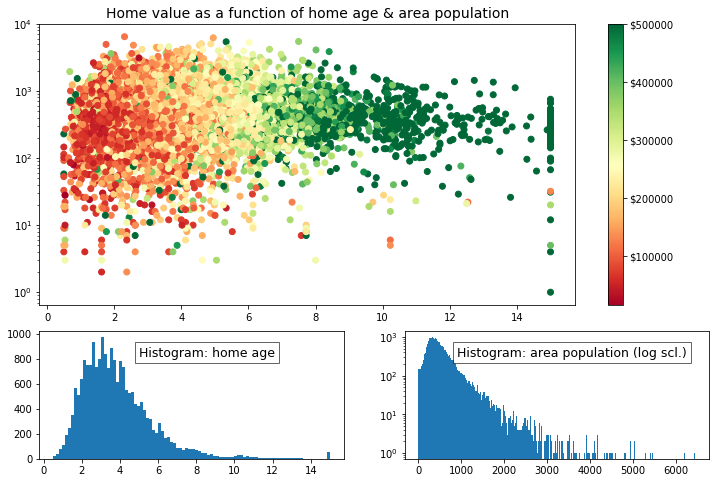

In [30]:
gridsize = (3, 2)
fig = plt.figure(figsize=(12, 8))
ax1 = plt.subplot2grid(gridsize, (0, 0), colspan=2, rowspan=2)
ax2 = plt.subplot2grid(gridsize, (2, 0))
ax3 = plt.subplot2grid(gridsize, (2, 1))
ax1.set_title('Home value as a function of home age & area population',
              fontsize=14)
sctr = ax1.scatter(x=age, y=pop, c=y, cmap='RdYlGn')
plt.colorbar(sctr, ax=ax1, format='$%d')
ax1.set_yscale('log')
ax2.hist(age, bins='auto')
ax3.hist(pop, bins='auto', log=True)

add_titlebox(ax2, 'Histogram: home age')
add_titlebox(ax3, 'Histogram: area population (log scl.)')

## Plotting with pandas

True

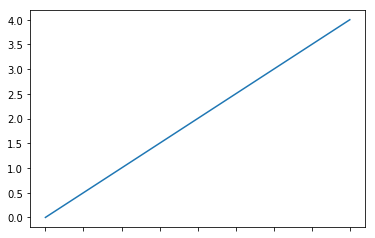

In [31]:
import pandas as pd

s = pd.Series(np.arange(5), index=list('abcde'))
ax = s.plot()

type(ax)


id(plt.gca()) == id(ax)

## Hard Example with Pandas

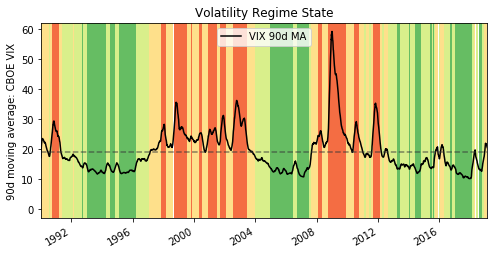

In [32]:
import pandas as pd
import matplotlib.transforms as mtransforms

url = 'https://fred.stlouisfed.org/graph/fredgraph.csv?id=VIXCLS'
vix = pd.read_csv(url, index_col=0, parse_dates=True, na_values='.',
                  infer_datetime_format=True,
                  squeeze=True).dropna()
ma = vix.rolling('90d').mean()
state = pd.cut(ma, bins=[-np.inf, 14, 18, 24, np.inf],
               labels=range(4))

cmap = plt.get_cmap('RdYlGn_r')
ma.plot(color='black', linewidth=1.5, marker='', figsize=(8, 4),
        label='VIX 90d MA')
ax = plt.gca()  # Get the current Axes that ma.plot() references
ax.set_xlabel('')
ax.set_ylabel('90d moving average: CBOE VIX')
ax.set_title('Volatility Regime State')
ax.grid(False)
ax.legend(loc='upper center')
ax.set_xlim(xmin=ma.index[0], xmax=ma.index[-1])

trans = mtransforms.blended_transform_factory(ax.transData, ax.transAxes)
for i, color in enumerate(cmap([0.2, 0.4, 0.6, 0.8])):
    ax.fill_between(ma.index, 0, 1, where=state==i,
                    facecolor=color, transform=trans)
ax.axhline(vix.mean(), linestyle='dashed', color='xkcd:dark grey',
           alpha=0.6, label='Full-period mean', marker='')